<a href="https://colab.research.google.com/github/statisthong/Data-Science-and-MLOps/blob/main/Decision_tree_in_Python_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=SLthX31dbtI

1. Import packages

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

2. Read data

In [2]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")

3. Inspect data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # check missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.drop('Cabin', axis = 1, inplace=True) #drop Cabin column

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
data.dropna(inplace=True) #drop all the data with missing

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
data.shape

(712, 11)

In [11]:
#Convert Sex Columns
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [12]:
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int64

4. Decide variable to use

In [13]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

5. Training/Testing split

In [14]:
# 80 % - training, 20% - testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 65)

In [15]:
y_train

60     0
520    1
876    0
188    0
473    1
      ..
230    1
406    0
372    0
724    1
147    0
Name: Survived, Length: 569, dtype: int64

In [16]:
y_test

244    0
526    1
833    0
681    1
39     1
      ..
567    0
326    0
221    0
866    1
272    1
Name: Survived, Length: 143, dtype: int64

6. Train a decision tree on training set

In [17]:
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(x_train, y_train)

7. Tree visualization

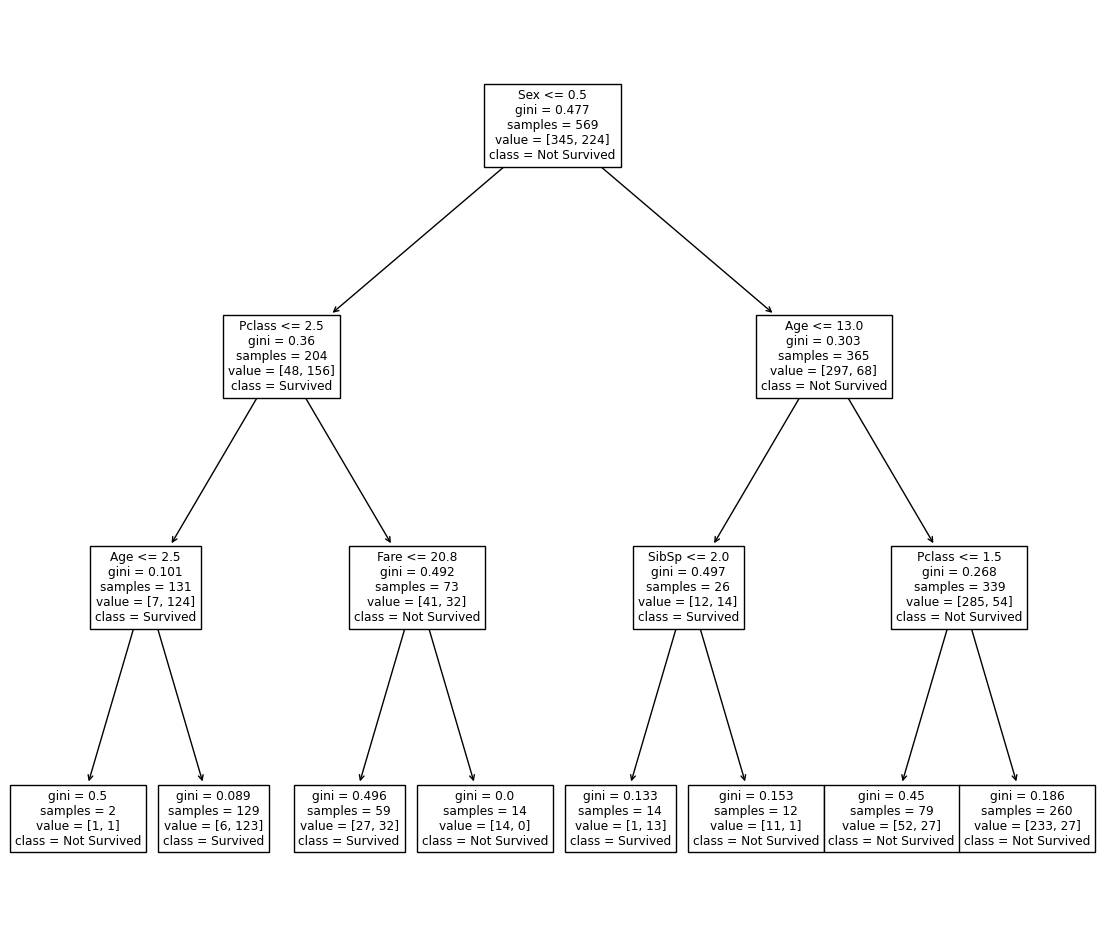

In [18]:
fig = plt.figure(figsize=(14,12)) # 72 pixel per 1
tree.plot_tree(dt_model, feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], class_names = ['Not Survived', 'Survived'] )
plt.show()

8. Evaluate model performance on testing set

In [19]:
# accuracy
dt_model.score(x_test, y_test)

0.7832167832167832

# 78.32% of the testing set is correctly classified.